In [17]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

#Pillow
from PIL import Image
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
model = load_model('trafficSignModel.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 128)       73856     
                                                      

In [26]:
Y_test = pd.read_csv('Test.csv')
test_images = Y_test["Path"].values
test_labels = Y_test["ClassId"].values

In [33]:
output = list()
for testImage in test_images:
    if testImage.endswith(".png"):
        pic = load_img(testImage, target_size=(50, 50))
        output.append(np.array(pic))

In [34]:
# convert training images into numpy array
XTest=np.array(output)

print(XTest.shape)
# pixel values range between 0-255. Divide each array by 255 to normalize
#testImages = testImages/255

(12630, 50, 50, 3)


In [21]:
print(test_labels[0])

16


In [35]:
predictions = model.predict(XTest)

395/395 [==============================] - 5s 13ms/step


In [15]:
print(len(predictions))

12630


In [36]:
predictions = np.argmax(predictions, axis=1)

In [37]:
print(predictions)

[16  1 38 ... 38  7 10]


In [38]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, predictions)*100)

Test Data accuracy:  75.82739509105305


In [39]:
print(test_labels)

[16  1 38 ...  6  7 10]


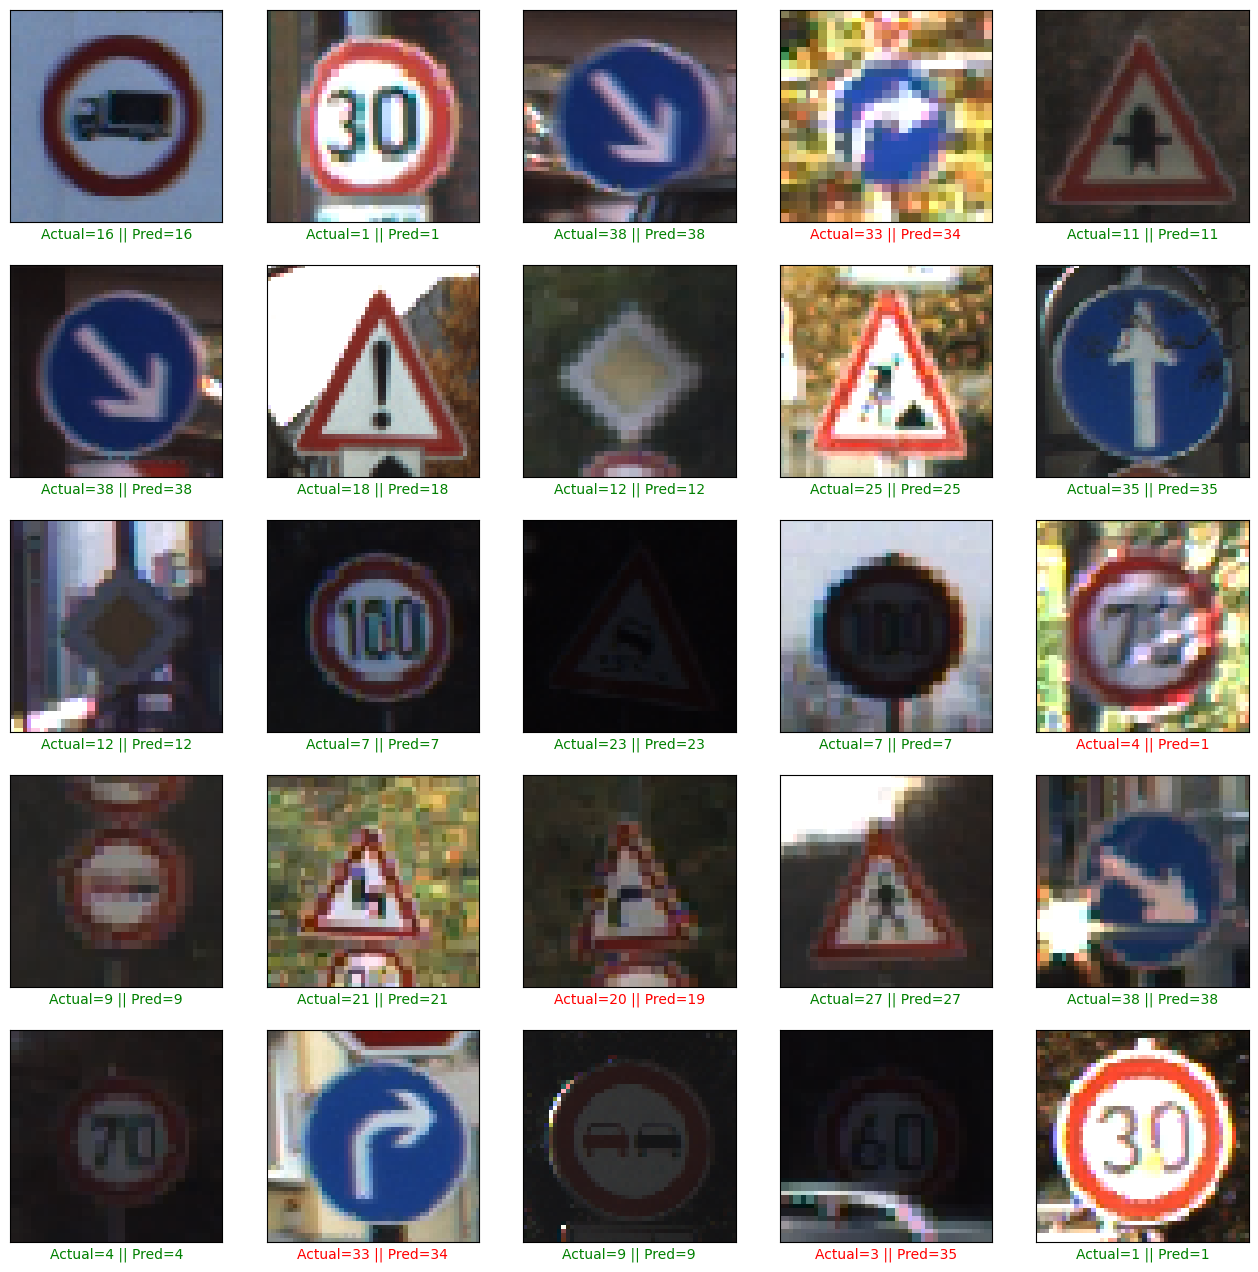

In [42]:
plt.figure(figsize = (16, 16))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = predictions[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(XTest[start_index + i])
plt.show()